# Predicting Food Delivery Time

## Exploratory Data Analysis (EDA)

### 1. Load the dataset, handle any missing/Nan values and encode the categorical features using an appropriate method.

#### Loading and handling missing/Nan Values

In [2]:
import pandas as pd

data = pd.read_csv('data/Food_Delivery_Times.csv')


print(data.isnull().sum())


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [3]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [4]:
numerical_columns

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

In [5]:
categorical_columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

In [6]:
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [7]:
data[categorical_columns] = data[categorical_columns].fillna('Unknown') # need to think, if I should use something like Mode of the column?


#### Encoding Categorical Features

In [8]:
data_categorical = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [9]:
data_categorical

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Unknown,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Unknown,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,False,True,True,False,False,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,False,True,False,False,False,False,True,False,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,False,True,False,False,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,54,False,False,False,False,False,False,False,False,True,False,False,False,True,False
996,271,16.28,8,9.0,71,False,True,False,False,False,True,False,False,False,True,False,False,False,True
997,861,15.62,26,2.0,81,False,False,True,False,False,False,False,False,True,False,False,False,False,True
998,436,14.17,8,0.0,55,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [10]:
data[data["Order_ID"] == 313]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
42,313,0.99,Unknown,Medium,Evening,Bike,15,4.579381,32


### 2. Plot histograms, boxplots, violin plots, etc. for the features (choose plots based on type of feature). State your observations/insights.

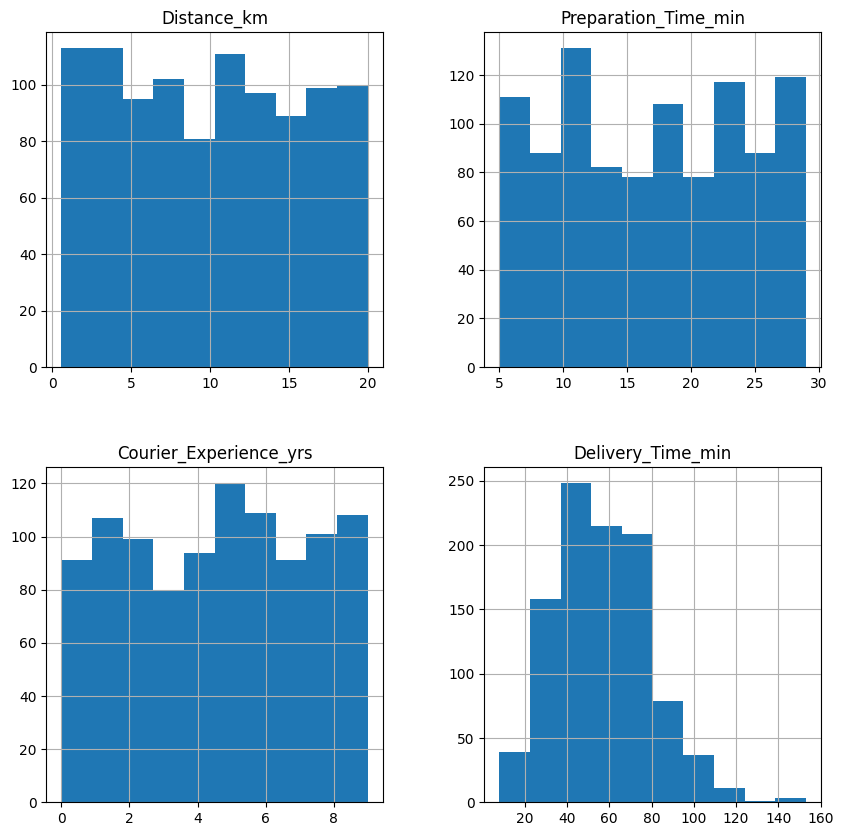

In [11]:
import matplotlib.pyplot as plt

excluded_column = 'Order_ID'
data_without_order_id = data.drop(columns=[excluded_column])

data_without_order_id.hist(figsize=(10, 10))
plt.show()

### 3. Split the dataset into train, test and validation sets (70:15:15 split) and scale the features

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# data[categorical_columns] = data[categorical_columns].fillna(
#     data[categorical_columns].mode().iloc[0]
# )

X = data_categorical.drop('Delivery_Time_min', axis=1)
y = data_categorical['Delivery_Time_min']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # (training) + (test + validation)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # (test) + (validation)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Validation set shape:", X_val_scaled.shape, y_val.shape)
print("Test set shape:", X_test_scaled.shape, y_test.shape)


Training set shape: (700, 18) (700,)
Validation set shape: (150, 18) (150,)
Test set shape: (150, 18) (150,)


## Linear Regression with Gradient Descent

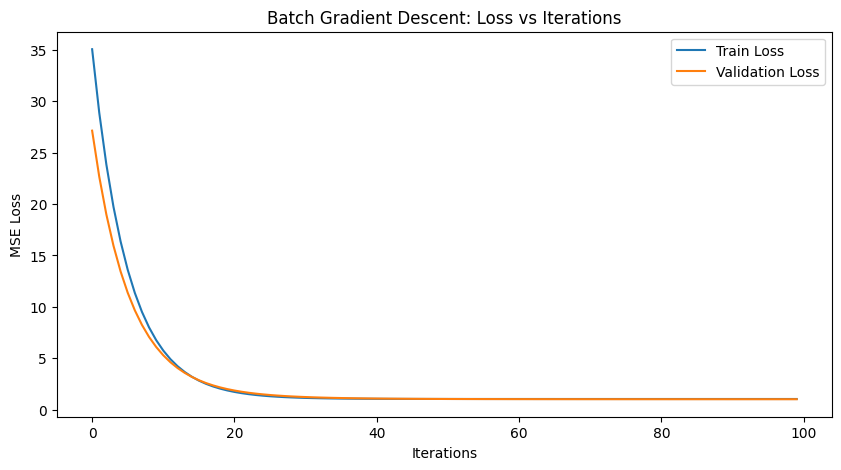

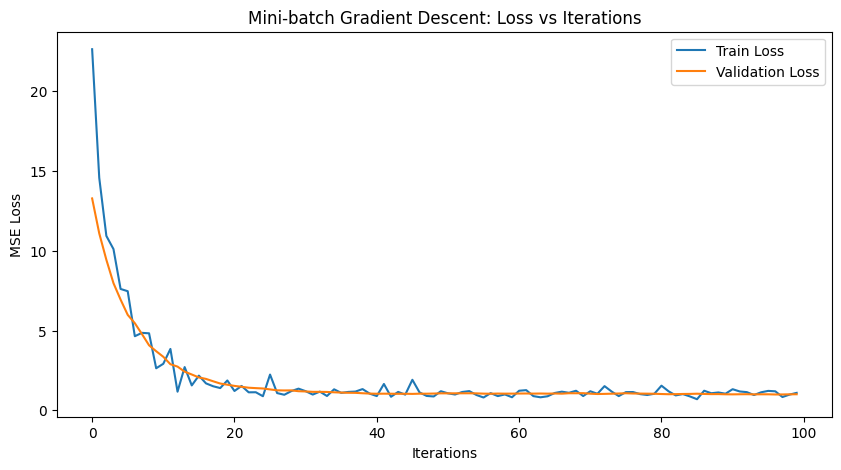

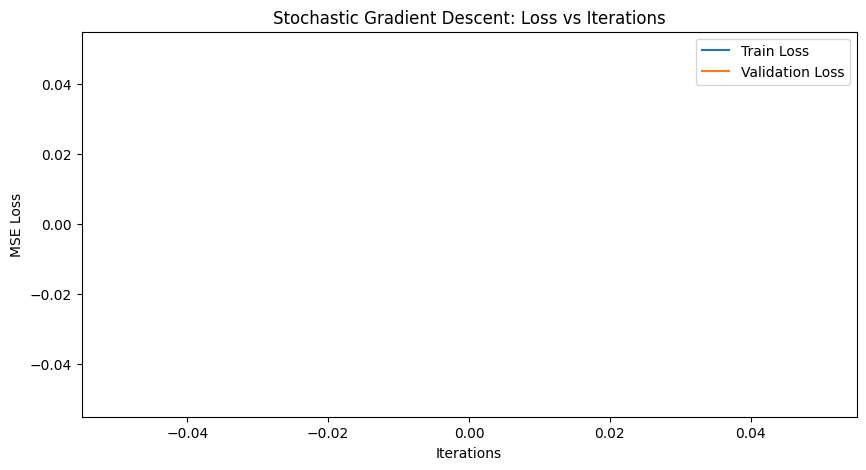

Final Results:
Batch - Test MSE: 1.0938, R2: 0.9680
Mini-batch - Test MSE: 1.0889, R2: 0.9681
Stochastic - Test MSE: 1.5028, R2: 0.9560


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def initialize_params(n_features, random_init=True):
    if random_init:
        w = np.random.randn(n_features) # random is best. In MR also, we saw that setting this to 0 is bad.
        b = 0
        return w, b
    else:
        w = np.zeros_like(n_features)
        b = 0
        return w, b

def predict(X, w, b):
    return np.dot(X, w) + b

def compute_loss_and_gradients(X, y, weights, bias):
    N = len(y)
    y_pred = predict(X, weights, bias)
    loss = np.mean((y - y_pred) ** 2)
    grad_w = -(2 / N) * np.dot(X.T, (y - y_pred))
    grad_b = -(2 / N) * np.sum(y - y_pred)
    return loss, grad_w, grad_b

def gradient_descent(X, y, X_val, y_val, method="batch", batch_size=32, lr=0.05, max_iter=100):
    n_features = X.shape[1]
    w, b = initialize_params(n_features, random_init=True)
    
    train_losses, val_losses = [], []
    N = len(y)
    
    for iteration in range(max_iter):
        if method == "batch":
            loss, grad_w, grad_b = compute_loss_and_gradients(X, y, w, b)
        elif method == "mini-batch":
            indices = np.random.choice(N, batch_size, replace=False)
            X_batch, y_batch = X[indices], y[indices]
            loss, grad_w, grad_b = compute_loss_and_gradients(X_batch, y_batch, w, b)
        elif method == "stochastic":
            for i in range(N):
                
                # can also think of randomising this selection... would that help?
                
                X_sample, y_sample = X[i:i+1], y[i:i+1]
                loss, grad_w, grad_b = compute_loss_and_gradients(X_sample, y_sample, w, b)
                w -= lr * grad_w
                b -= lr * grad_b
            continue
        
        w -= lr * grad_w
        b -= lr * grad_b

        train_losses.append(loss)
        
        val_loss, _, _ = compute_loss_and_gradients(X_val, y_val, w, b)
        val_losses.append(val_loss)

    return w, b, train_losses, val_losses

def evaluate_model(X, y, w, b):
    y_pred = predict(X, w, b)
    mse = np.mean((y - y_pred) ** 2)
    r2 = r2_score(y, y_pred)
    return mse, r2

def plot_results(train_losses, val_losses, method):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title(f"{method.capitalize()} Gradient Descent: Loss vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.show()

Answer_to_the_Ultimate_Question_of_Life_the_Universe_and_Everything = 42

def main():
    np.random.seed(Answer_to_the_Ultimate_Question_of_Life_the_Universe_and_Everything)
    X = np.random.randn(1000, 3)
    y = 4 * X[:, 0] - 2 * X[:, 1] + 3 * X[:, 2] + np.random.randn(1000)
    
    X_train, X_val, X_test = X[:700], X[700:850], X[850:]
    y_train, y_val, y_test = y[:700], y[700:850], y[850:]
    
    methods = ["batch", "mini-batch", "stochastic"]
    results = {}
    
    for method in methods:
        w, b, train_losses, val_losses = gradient_descent(
            X_train, y_train, X_val, y_val, method=method, max_iter=100
        )
        test_mse, test_r2 = evaluate_model(X_test, y_test, w, b)
        results[method] = {"test_mse": test_mse, "test_r2": test_r2}
        
        plot_results(train_losses, val_losses, method)
    
    print("Final Results:")
    for method, metrics in results.items():
        print(f"{method.capitalize()} - Test MSE: {metrics['test_mse']:.4f}, R2: {metrics['test_r2']:.4f}")

main()
